In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from modules import solver, presolver
from pyballistics import ozvb_lagrange, get_db_powder, get_powder_names

In [44]:
d = 125*1e-3
name = "15/1 тр В/А"
wq_0, ro_0 = 1.517220, 844.921773
bounds = [1.3, 450]
init_dict  = presolver.init_dict(name)

In [46]:
%%time
tabel = presolver.random_points(init_dict, [2.5, 700], bounds, max_loop=10000)

Wall time: 23min 27s


In [47]:
tabel = pd.DataFrame(tabel)
# save ...

In [48]:
tabel.head()

wq           ro reason
0  3.329411   808.280259  p_max
1  1.843797  1118.534746  p_max
2  3.600579   508.017795    x_p
3  2.721732   417.143212    x_p
4  2.675969   860.578609  p_max

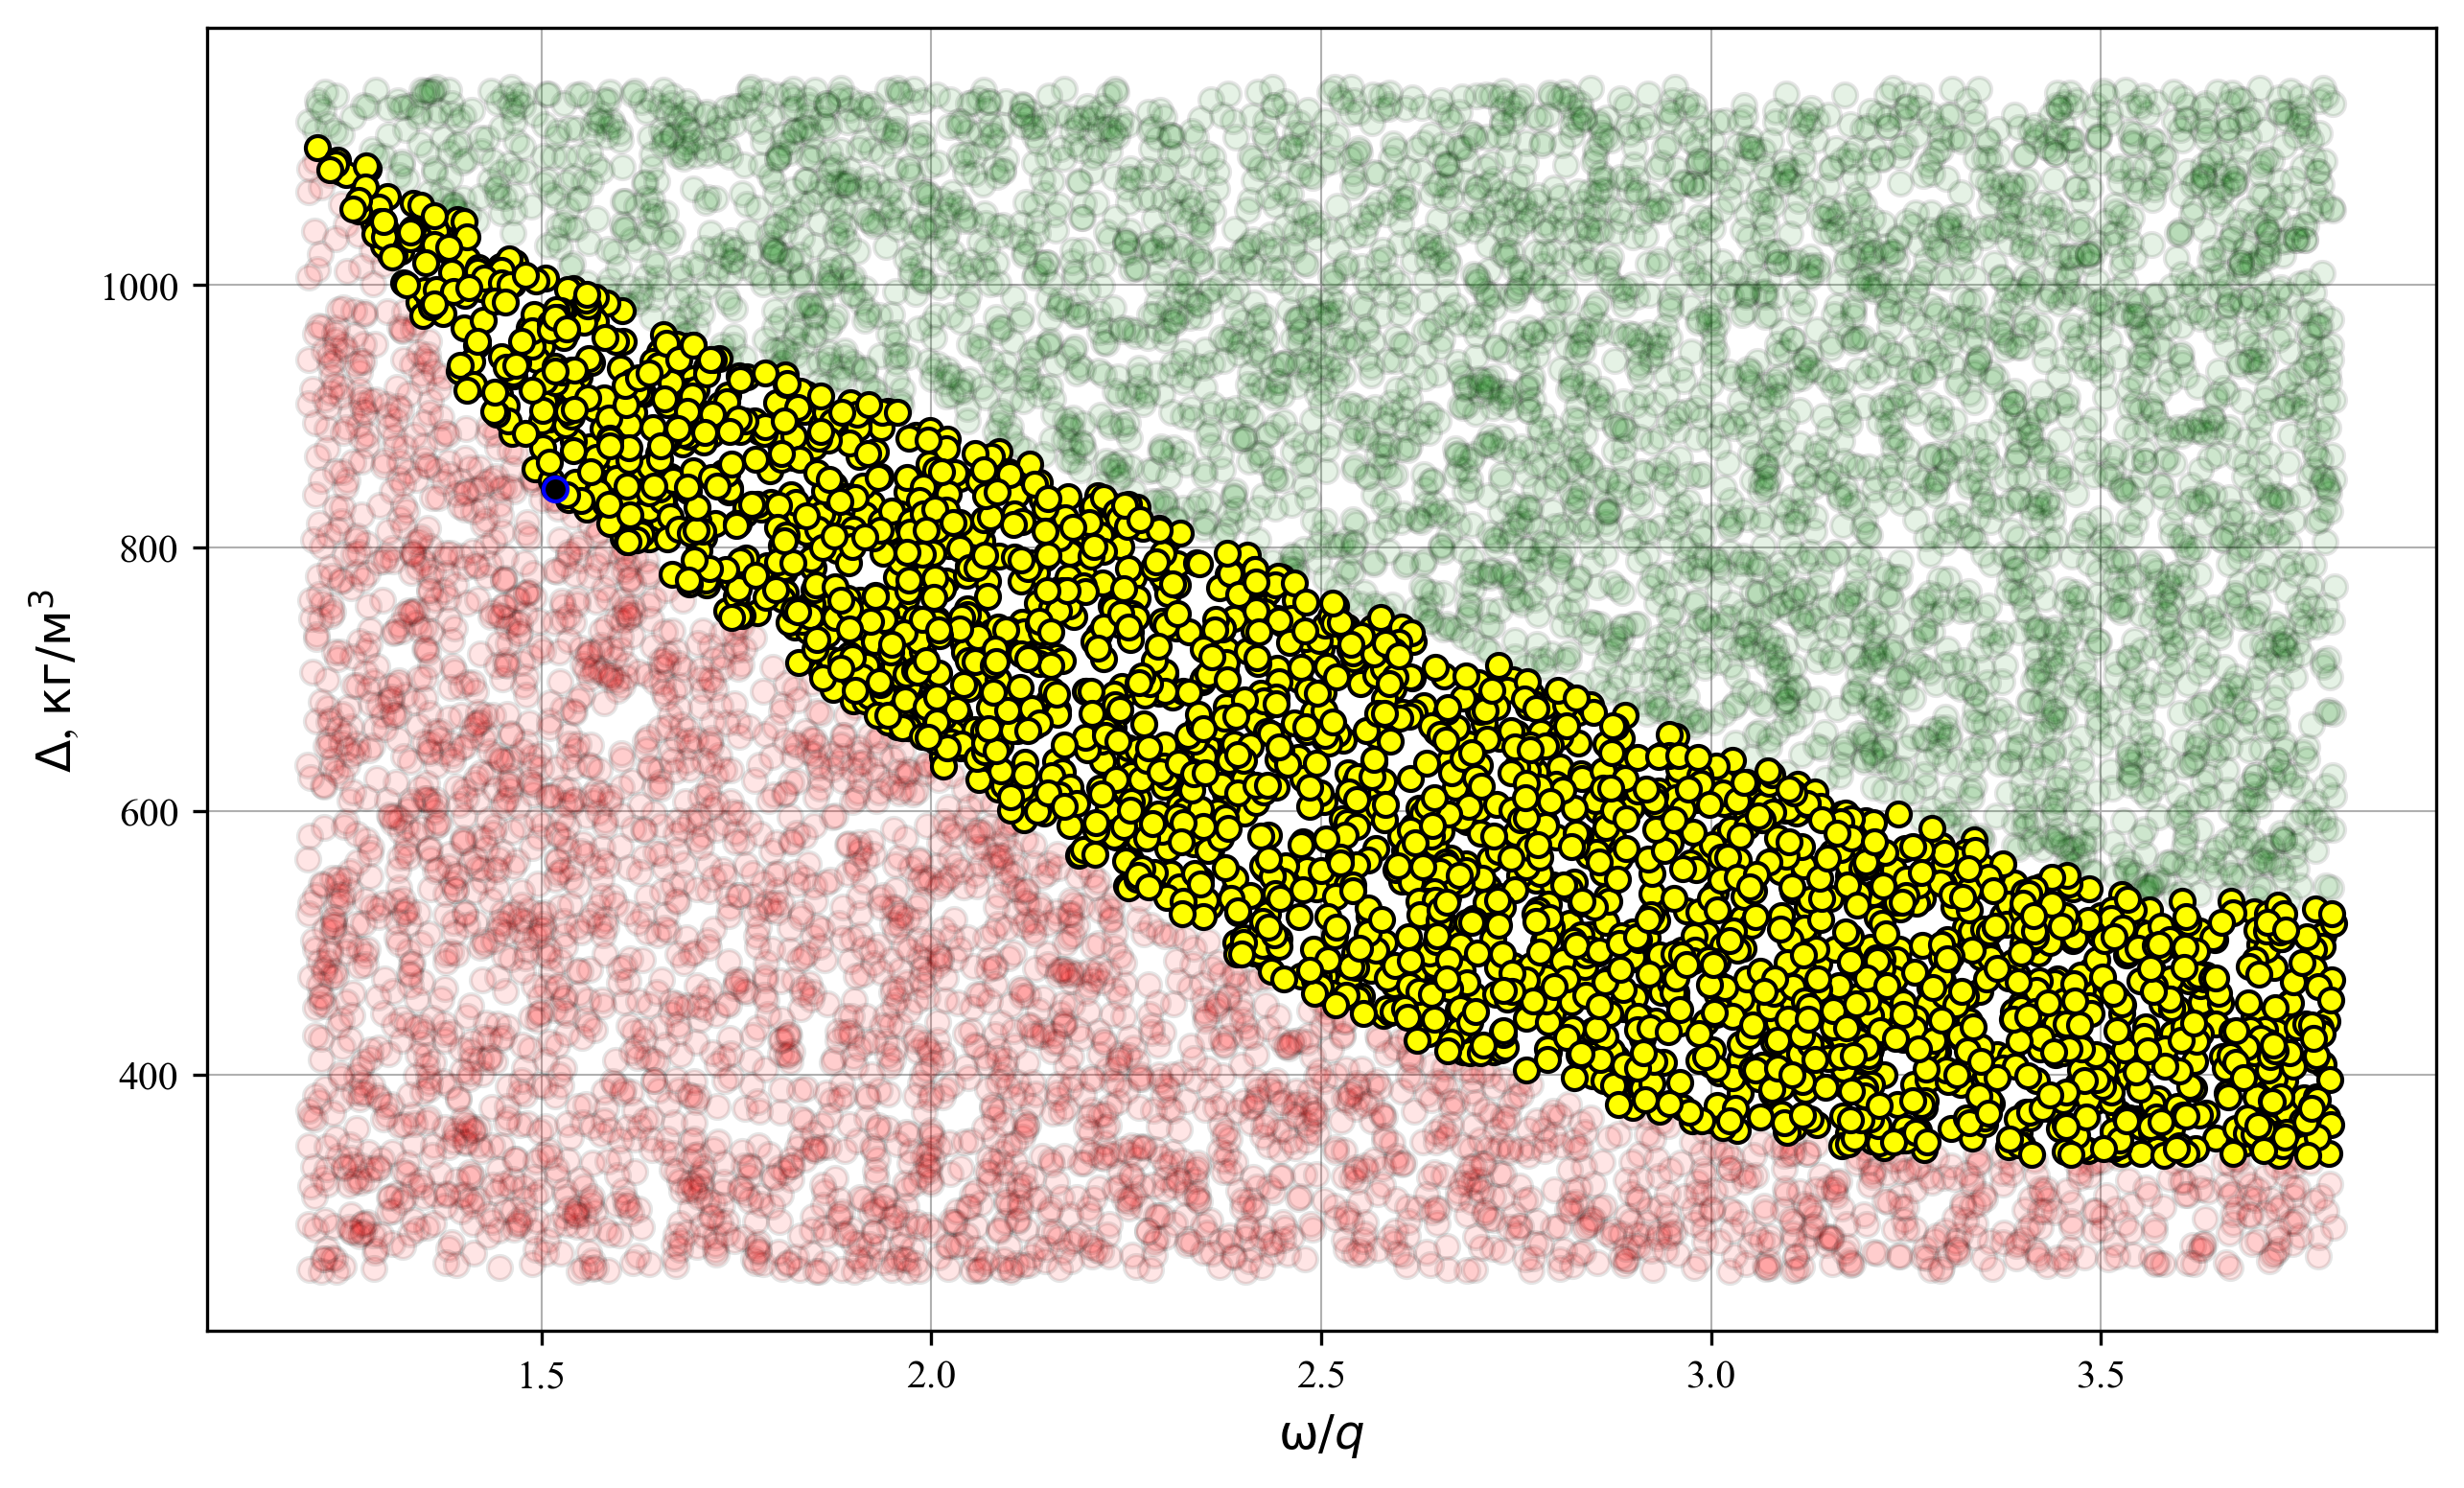

In [49]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"

fig = plt.figure(figsize=(10,6), dpi=300)

plt.scatter(tabel[tabel['reason']=='v_p']['wq'], tabel[tabel['reason']=='v_p']['ro'],\
            color='red', edgecolors='black', linewidths=1, zorder = 3, alpha=0.1)
plt.scatter(tabel[tabel['reason']=='p_max']['wq'], tabel[tabel['reason']=='p_max']['ro'],\
            color='green', edgecolors='black', linewidths=1, zorder = 3, alpha=0.1)
plt.scatter(tabel[tabel['reason']=='x_p']['wq'], tabel[tabel['reason']=='x_p']['ro'],\
            color='yellow', edgecolors='black', linewidths=1, zorder = 3)
plt.scatter(wq_0, ro_0, color='black', edgecolors='blue', linewidths=1, zorder = 3)

#plt.legend(fontsize=16, loc=(1.04,0.15) )
plt.xlabel(r'$\mathrm{\omega/\mathit{q}}$',  fontsize = 12)
plt.ylabel('$\mathit{\Delta}$, $\mathrm{кг/м^3}$',  fontsize = 12)
plt.grid(linewidth=0.5)
plt.show()